In [8]:
#Import pandas
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

In [9]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from google.colab import files

In [10]:
df = pd.read_csv("wells_abandoned.csv")
#Remove spaces in column names
df.columns = df.columns.str.replace(' ', '')

In [11]:
df.WELLSTATUSCODE.value_counts()
#UN: well status unknown, but detail on location, etc, provided to DEC through misc. means
#UL: well status unknown, but well located and inspection performed
#UM: well status unknown, DEC was unable to locate the well

UN    2375
UL    2342
UM    2134
Name: WELLSTATUSCODE, dtype: int64

In [12]:
#Filtering out wells that DEC was unable to locate
df_located = df[df['WELLSTATUSCODE']!='UM']

In [13]:
len(df_located)

4717

In [14]:
#Counting number of wells in each NYSDEC region
wells_region = df_located.REGION.value_counts().rename_axis('region').reset_index(name='count')
wells_region
#Region 9: Western NY, Region 8: Western Finger Lakes
#More details about NYSDEC regions: https://www.dec.ny.gov/about/558.html and https://www.dec.ny.gov/about/76070.html

,region,count
0,9,3880
1,8,557
2,7,222
3,6,48
4,4,6
5,5,3
6,3,1


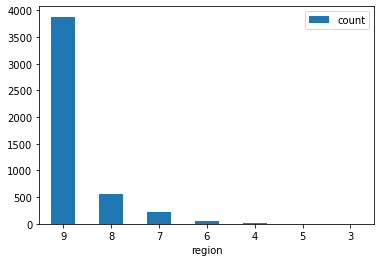

In [15]:
wells_region.plot.bar(x='region', y='count', rot=0)

In [16]:
#Calculating percentage of wells in each NYSDEC region
df_located.REGION.value_counts(normalize=True)

9    0.822557
8    0.118084
7    0.047064
6    0.010176
4    0.001272
5    0.000636
3    0.000212
Name: REGION, dtype: float64

In [17]:
#Count number of wells in each county
wells_county = df_located.COUNTY.value_counts().rename_axis('county').reset_index(name='count')
wells_county.head(10)

,county,count
0,Allegany,2075
1,Cattaraugus,1370
2,Steuben,418
3,Erie,253
4,Chautauqua,146
5,Oswego,118
6,Ontario,43
7,Tompkins,37
8,Oneida,33
9,Wyoming,33


In [ ]:
 # normalize for the above^^

In [18]:
#Download CSV of number of unplugged and abandoned wells in each county – remove # in below script to run the download
#wells_county.to_csv('unplug_abdn.csv') 
#files.download('unplug_abdn.csv')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

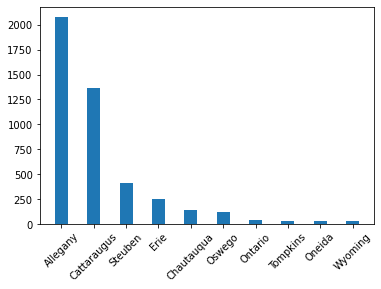

In [19]:
county = wells_county['county'].head(10)
county_ct = wells_county['count'].head(10)

plt.bar(county, county_ct, width = 0.4)
plt.xticks(rotation=45)

In [20]:
#Calculating percent of wells in each county
df_located.COUNTY.value_counts(normalize=True)

Allegany       0.439898
Cattaraugus    0.290439
Steuben        0.088616
Erie           0.053636
Chautauqua     0.030952
Oswego         0.025016
Ontario        0.009116
Tompkins       0.007844
Oneida         0.006996
Wyoming        0.006996
Genesee        0.005088
Livingston     0.004452
Schuyler       0.004240
Madison        0.003604
Onondaga       0.002756
Cayuga         0.002756
Chemung        0.002120
Yates          0.001908
Broome         0.001696
Tioga          0.001696
Seneca         0.001484
Jefferson      0.001272
Lewis          0.001272
Chenango       0.001060
Monroe         0.000636
Herkimer       0.000636
Cortland       0.000636
Niagara        0.000636
Albany         0.000424
Washington     0.000424
Warren         0.000212
Delaware       0.000212
Montgomery     0.000212
Schoharie      0.000212
Orleans        0.000212
Schenectady    0.000212
Wayne          0.000212
Sullivan       0.000212
Name: COUNTY, dtype: float64

In [21]:
#Calculating number of wells in each town
wells_city = df_located.TOWN.value_counts().rename_axis('city').reset_index(name='count')
wells_city.head(25)

,city,count
0,Allegany,1142
1,Bolivar,954
2,Wirt,357
3,West Union,340
4,Alma,336
5,Genesee,178
6,Carrollton,83
7,Scio,79
8,Collins,61
9,Sandy Creek,56


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

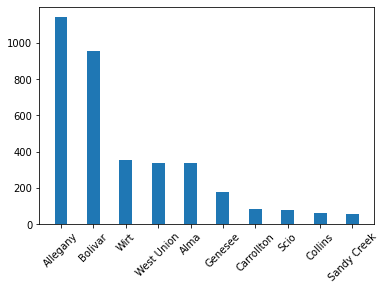

In [22]:
city = wells_city['city'].head(10)
city_ct = wells_city['count'].head(10)

plt.bar(city, city_ct, width = 0.4)
plt.xticks(rotation=45)

In [23]:
#Calculating percent of wells in each town
df_located.TOWN.value_counts(normalize=True).head(25)

Allegany       0.242103
Bolivar        0.202247
Wirt           0.075684
West Union     0.072080
Alma           0.071232
Genesee        0.037736
Carrollton     0.017596
Scio           0.016748
Collins        0.012932
Sandy Creek    0.011872
Olean          0.010600
Brant          0.010176
Willing        0.009540
Wellsville     0.009540
Richland       0.008268
Busti          0.007632
Red House      0.007208
Clarksville    0.006360
Sheridan       0.006148
Perrysburg     0.005936
Alden          0.005300
Hanover        0.005300
UNK            0.004028
Lancaster      0.003816
Tonawanda      0.003604
Name: TOWN, dtype: float64